# Laboratorio # 6. Introducción al procesamiento de imágenes
**Estudiante: Luna Katalina Quintero Jiménez, T00068464.**

**I. Introducción.**

Las imágenes médicas desempeñan un papel fundamental en el diagnóstico y tratamiento de una amplia gama de enfermedades y condiciones médicas. Este laboratorio, centrado en el procesamiento de imágenes médicas utilizando Python, nos proporciona una sólida comprensión de cómo manipular y analizar imágenes en el ámbito de la medicina.

Desde los rayos X hasta las resonancias magnéticas, las imágenes médicas nos permiten visualizar estructuras internas del cuerpo humano de manera no invasiva, proporcionando información vital para los profesionales de la salud. Este laboratorio nos sumerge en el mundo de las imágenes médicas digitales, explorando técnicas esenciales como la convolución, la transformada de Fourier y técnicas de filtrado como el Umbral Binario.

**II. Marco teórico.**

El **diagnóstico por imágenes** es esencial para la medicina moderna, ofreciendo a los profesionales médicos una visión detallada del interior del cuerpo humano. Las **radiografías** son valiosas para detectar fracturas, neumonía y cáncer de mama, proporcionando imágenes de huesos, tejidos blandos y pulmones. Las **tomografías computarizadas (TC)** ofrecen imágenes tridimensionales que son útiles en la detección de fracturas, tumores y enfermedades cardiovasculares, con la posibilidad de administrar medios de contraste para mejorar la visualización. Los estudios de medicina nuclear, como la **gammagrafía**, brindan información funcional sobre órganos y tejidos, siendo útiles en la detección temprana de enfermedades y la evaluación de la respuesta al tratamiento.

Las **resonancias magnéticas (RM)** proporcionan imágenes detalladas de tejidos blandos, órganos internos y estructuras musculoesqueléticas, siendo valiosas en el diagnóstico de enfermedades neurológicas, cardíacas y lesiones musculoesqueléticas complejas. Las **ecografías**, mediante el uso de ondas sonoras, ofrecen imágenes en tiempo real de órganos internos, tejidos y fluidos corporales, siendo seguras y no invasivas, y se utilizan ampliamente en diversas especialidades médicas, especialmente en obstetricia y evaluación abdominal. Estas tecnologías de diagnóstico por imágenes son fundamentales para proporcionar un diagnóstico preciso y un tratamiento efectivo a los pacientes. [1]

Los avances en tecnologías de imágenes médicas han mejorado los procedimientos de diagnóstico, pero pueden generar imágenes con problemas de calidad como borrosidad o distorsión. Para abordar esto, se emplea el **procesamiento de imágenes médicas**, que ofrece herramientas para la detección automática de anomalías y la extracción de información relevante. Este proceso enfrenta desafíos, como la necesidad de técnicas como la segmentación y el realce de imágenes. A pesar de esto, su objetivo es reducir información no esencial en las imágenes para facilitar su interpretación, resaltando datos útiles para diagnósticos y procedimientos quirúrgicos. El uso de técnicas avanzadas de aprendizaje profundo, que pueden extraer características detalladas de las imágenes, promete mejorar la precisión y eficiencia del diagnóstico clínico en el futuro. [2]

La **transformada de Fourier** puede emplearse para diseñar operaciones de filtrado en imágenes en el dominio de las frecuencias. Ello presenta algunas ventajas con respecto a las convoluciones realizadas en el dominio espacial. Por un lado, es indicada cuando se trabaja con tamaños de filtro muy grandes. Además, el diseño de los filtros es más intuitivo, ya que el ruido está asociado a determinadas frecuencias, fácilmente identificables en el espectro de Fourier. Su aplicación principal en este campo es el diseño de filtros para la eliminación del ruido periódico. Si bien se requiere interpretar las imágenes transformadas e identificar los patrones debidos al ruido, una vez hecho esto su eficiencia es muy superior y, en ocasiones, la única alternativa viable de filtrado. [3]

En Python, las imágenes se interpretan como matrices de dos o tres dimensiones, donde cada valor en la matriz corresponde a la intensidad de la imagen en un punto específico, es decir, un píxel. Las imágenes médicas generalmente se representan en escala de grises, lo que implica una matriz bidimensional. Por otro lado, las imágenes a color se representan con matrices tridimensionales, donde cada dimensión corresponde a un componente de color según el modelo de representación, como rojo, verde y azul. En las imágenes en escala de grises, si se codifican los píxeles con N bits, hay 2N niveles de gris que indican la claridad u oscuridad del píxel.


**III. Procedimiento.**

**Parte 1. Convolución entre una imagen y un kernel.**

In [2]:
%%capture
!pip install SimpleITK matplotlib
import numpy as np
import ipywidgets as ipyw
import matplotlib.pyplot as plt
import SimpleITK as sitk
from scipy import signal

In [3]:
path = '/content/MR-head.nrrd'#@param
Image = 77#@param

class ImageSliceViewer3D:
    def __init__(self, volume, figsize=(12, 4), cmap='gray'):
        self.volume = volume
        self.figsize = figsize
        self.cmap = cmap
        self.v = [np.min(volume), np.max(volume)]

        # Variables para almacenar las vistas
        self.coronal_view = None
        self.axial_view = None
        self.sagittal_view = None

        # Llamar para seleccionar la slice
        ipyw.interact(self.plot_slice,
            z=ipyw.IntSlider(min=Image, max=130 - 1, step=1, continuous_update=False,
            description='Slice:'))

    def plot_slice(self, z):
        f, ax = plt.subplots(1, 3, figsize=self.figsize)

        # Vista Coronal
        self.coronal_view = self.volume[:, :, z]
        ax[0].imshow(self.coronal_view, cmap=plt.get_cmap(self.cmap),
            vmin=self.v[0], vmax=self.v[1])
        ax[0].set_title('Coronal')

        # Vista Sagital
        self.axial_view = self.volume[:, z, :].T
        ax[1].imshow(self.axial_view,
            cmap=plt.get_cmap(self.cmap), vmin=self.v[0], vmax=self.v[1])
        ax[1].set_title('Axial')

        # Vista Axial
        self.sagittal_view = self.volume[z, :, :]
        ax[2].imshow(self.sagittal_view,
            cmap=plt.get_cmap(self.cmap), vmin=self.v[0], vmax=self.v[1])
        ax[2].set_title('Sagital')

        plt.tight_layout()
        plt.show()

# Ruta a tu archivo NRRD
archivo_nrrd = path

# Cargar el archivo NRRD
imagen = sitk.ReadImage(archivo_nrrd)

# Obtener los datos de píxeles
datos_imagen = sitk.GetArrayFromImage(imagen)

# Visualizar las vistas coronal, sagital y axial
viewer = ImageSliceViewer3D(datos_imagen)


# Después de ejecutar el visor
coronal_view = viewer.coronal_view
axial_view = viewer.axial_view
sagital_view = viewer.sagittal_view

interactive(children=(IntSlider(value=77, continuous_update=False, description='Slice:', max=129, min=77), Out…

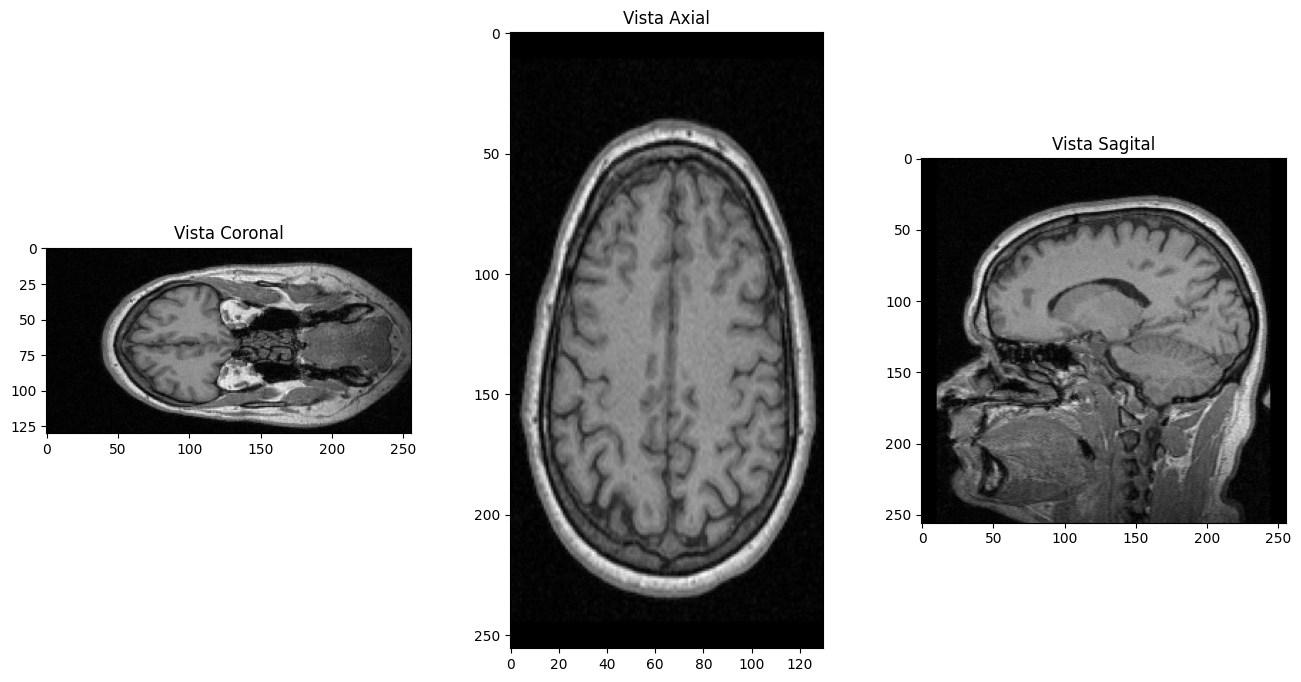

In [5]:
# @title Imagen seleccionada y sus distintas vistas.
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.title("Vista Coronal")
plt.imshow(coronal_view,cmap="gray")
plt.subplot(132)
plt.title("Vista Axial")
plt.imshow(axial_view,cmap="gray")
plt.subplot(133)
plt.title("Vista Sagital")
plt.imshow(sagital_view,cmap="gray")

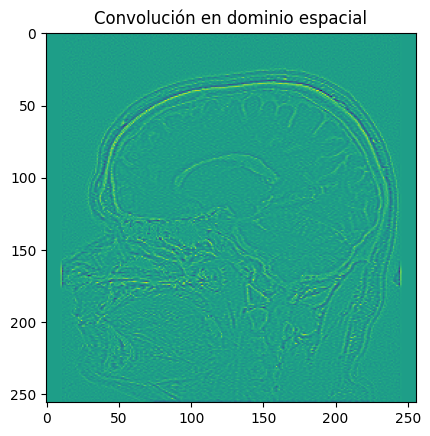

In [6]:
#Filtrado con kernel para bordes, kernel es una imagen PEQUEÑA.
#dominio espacial
kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
Imconv =signal.convolve2d(sagital_view,kernel, mode='same')
plt.title("Convolución en dominio espacial")
plt.imshow(Imconv)

**Parte 2. Usando el teorema de convolución con la transformada de Fourier.**

In [9]:
#Ahora en el dominio de la frecuencia habrá una multiplicación de matrices.
#El número de filas debe ser igual que el número de columnas. MISMO TAMAÑO.
#Para multiplicar el kernel se debe crear una imagen de igual tamaño que la vista sagital pero que esté llena de ceros.
#Las primeras 3 filas y 3 columnas deben ser igual a kernel y lo demás es negro.
#Se calcula la transformada de la imagen, también debe hacerse para el kernel para poder multiplicarlos en frecuencia.
#Luego creo un arreglo de ceros del tamaño de la vista sagital.
#Las primeras 3 filas y columnas de k deben ser iguales a kernel (esto depende del tamaño del kernel)
#Listo! ya se puede calcular la transformada de Fourier del kernel y de la imagen.
#Luego se multiplican ambas transformadas y se saca la inversa.

IM = np.fft.fft2(sagital_view)
k = np.zeros(sagital_view.shape)
k[:3,:3] = kernel
K = np.fft.fft2(k) #Fourier Transform
prod = IM*K
imf = np.fft.ifft2(prod)

#Para visualizar los resultados, se debe usar solo la parte real de la transformada inversa
#anteriormente estimada.

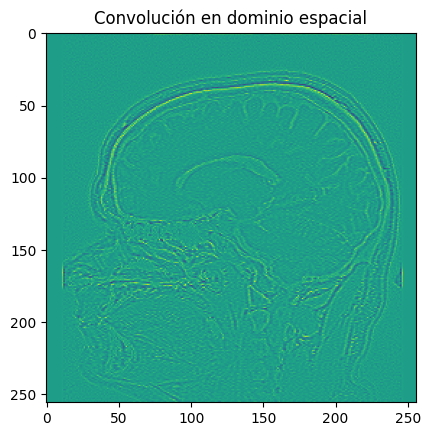

In [10]:
plt.title("Convolución en dominio espacial")
plt.imshow(np.real(imf))

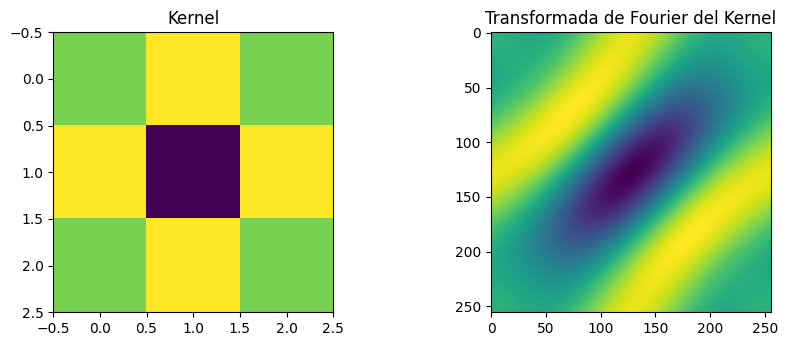

In [11]:
#Plotiando el kernel y la transformada de fourier del Kernel
k = np.zeros(IM.shape)
k[:3,:3] = kernel
K = np.fft.fft2(k) #Transformada de Fourier
plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title("Kernel")
plt.imshow(kernel)
plt.subplot(232)
plt.title("Transformada de Fourier del Kernel")
plt.imshow(K.real)
plt.show()

**Parte 3. Usando otros kernels.**

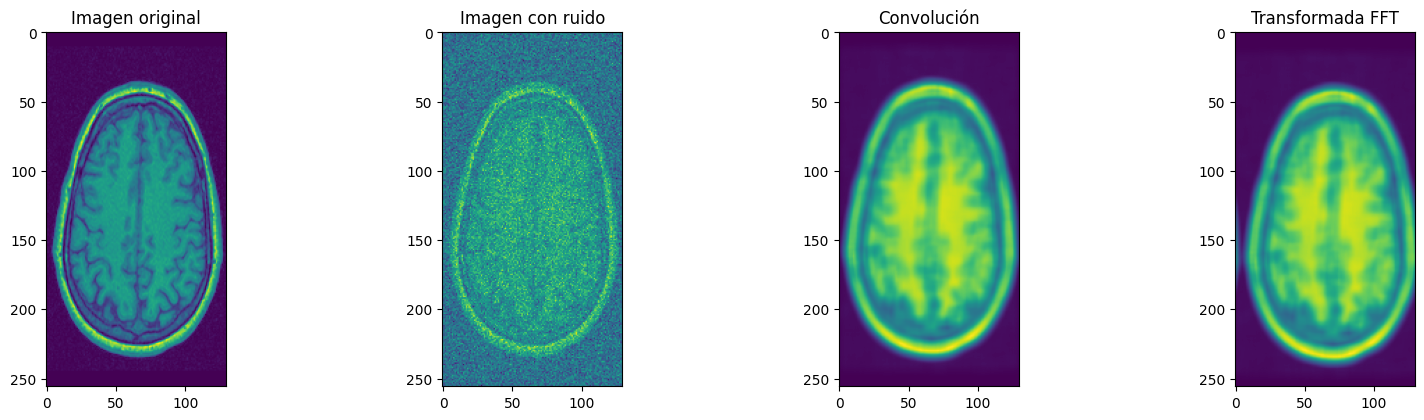

In [12]:
#Obtener imagen original - con ruido - convulución - transfromada, la convolución y transfromadas se hicieron con la imagen ruidosa.

im = axial_view #imagen a usar

noise = np.random.normal(0, 40, im.shape) #agregando ruido Gaussiano
imnoise = im+noise #ruido

kernel = np.ones([9,9])*1/(9*9) #con este kernel se hizo la convolución y la transformada de Fourier de la imagen axial
IM = np.fft.fft2(axial_view)
k = np.zeros(axial_view.shape)
k[:9,:9] = kernel
K = np.fft.fft2(k) #Transformada de Fourier
prod = IM*K
imf = np.fft.ifft2(prod)

Imconv =signal.convolve2d(axial_view,kernel, mode='same') #convolución

plt.figure(figsize=(16, 8))
#subplot(número filas, número columnas, índice)
plt.subplot(241)
plt.title("Imagen original")
plt.imshow(im)
plt.subplot(242)
plt.title("Imagen con ruido")
plt.imshow(imnoise)
plt.subplot(243)
plt.title("Convolución")
plt.imshow(Imconv)
plt.subplot(244)
plt.title("Transformada FFT")
plt.imshow(imf.real)
plt.tight_layout()
plt.show()

Cálculo de la convolución entre la imagen y un kernel2.

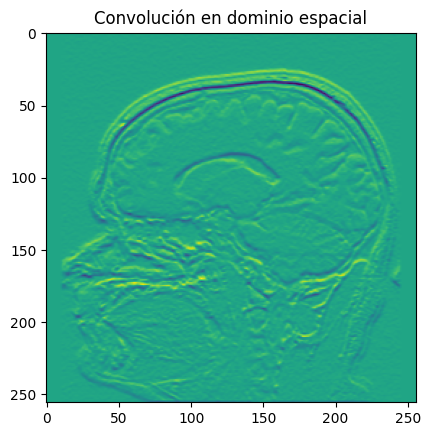

In [13]:
#Obtener convulución con kernel2 de la imagen original
kernel2 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
Imconv =signal.convolve2d(sagital_view,kernel2, mode='same')
plt.title("Convolución en dominio espacial")
plt.imshow(Imconv)

**IV. Análisis de resultados.**

Haciendo uso de la imagen “Sagital_view”, se consultó un filtro distinto a los empleados anteriormente. Se elaboró una descripción del mismo, haciendo énfasis en sus
principales ventajas y desventajas. Posteriormente, se procesó la imagen empleando el
filtro descrito.

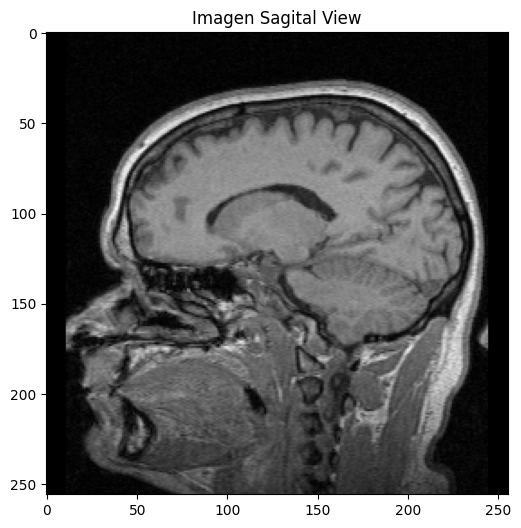

In [16]:
plt.figure(figsize=(6,6))
plt.imshow(sagital_view, cmap='gray')
plt.title('Imagen Sagital View')
plt.show()

El filtro Umbral Binario se emplea para convertir una imagen en una versión binaria, alterando los valores de los píxeles. El usuario especifica los umbrales superior e inferior, así como los valores de intensidad para los píxeles dentro y fuera de estos umbrales. Cada píxel de la imagen de entrada se evalúa en relación con los umbrales inferior y superior [4]. Si el valor del píxel cae dentro del rango definido por (inferior, superior), el píxel de salida adopta la intensidad definida para el umbral. En caso contrario, se asigna la intensidad definida para los píxeles fuera del umbral. La umbralización suele aplicarse como el último paso de una serie de operaciones de segmentación.

Ventajas:

*   Es un filtro beneficioso para distinguir entre el área principal de interés y el fondo de una imagen.
*   Facilita la simplificación de la imagen, lo cual resulta ventajoso en contextos específicos como el reconocimiento de formas.

Desventajas:

*   Determinar el umbral adecuado puede resultar complicado, especialmente en casos de imágenes con cambios de iluminación.
*    Este proceso puede acarrear la pérdida de información, dado que todos los píxeles que superen o estén por debajo del umbral se ajustarán a los mismos valores.



Explicando un poco el código, al codificar sagital_view > threshold, se realiza una comparación en cada píxel de la imagen 'sagital_view'. Si el valor del píxel supera al umbral establecido, el resultado es 'True' (1 al convertirse a un número). De lo contrario, el resultado es 'False' (0 al convertirse a un número). Posteriormente, al asignar este resultado a la variable 'binary_image', se crea una nueva imagen binaria. Aquí, los píxeles con valores superiores al umbral se establecen en 1, mientras que los valores iguales o inferiores al umbral se establecen en 0.

Por lo tanto, además de realizar la comparación de cada píxel con el umbral, esta línea de código también genera una representación binaria de la imagen original. Este proceso resulta útil para distinguir áreas de interés (píxeles más brillantes que el umbral) del fondo de la imagen (píxeles más oscuros que el umbral), facilitando la segmentación y el análisis de la imagen.

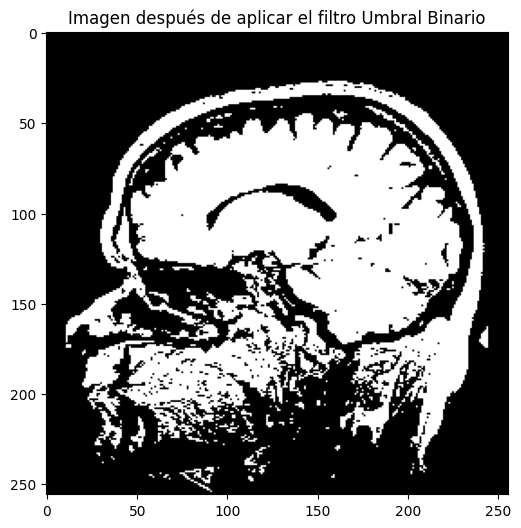

In [26]:
#Imagen con el filtro descrito, "Umbral Binario."
import numpy as np
import matplotlib.pyplot as plt
threshold = 58 #Umbral
binary_image = sagital_view > threshold
#se está creando una nueva imagen binaria a partir de la original, utilizando el valor del umbral
#para determinar qué píxeles se establecen en 1 (blanco) y cuáles se establecen en 0 (negro).
plt.figure(figsize=(6,6))
plt.imshow(binary_image, cmap='gray')
plt.title('Imagen después de aplicar el filtro Umbral Binario')
plt.show()

**V. Conclusiones.**

Este laboratorio ha brindado una valiosa experiencia en el procesamiento de imágenes médicas utilizando Python. Se ha logrado cargar y manipular imágenes, calcular y visualizar la transformada de Fourier, así como realizar operaciones básicas de filtrado. Estas habilidades son fundamentales en el campo del diagnóstico por imágenes, donde la precisión y la interpretación de las imágenes son críticas para el diagnóstico y el tratamiento de enfermedades.

A través de este laboratorio, se ha comprendido la importancia de la transformada de Fourier en el procesamiento de imágenes y su aplicación en el diseño de filtros para la eliminación de ruido. Si bien enfrentamos desafíos en la elección de umbrales y la pérdida de información asociada con ciertas operaciones de filtrado, se ha aprendido a abordar estos desafíos con precaución y consideración.

Además, se exploraron diversas referencias y recursos que nos ayudan a comprender mejor los conceptos teóricos subyacentes y a aplicarlos de manera efectiva en nuestro trabajo práctico. Estas habilidades son transferibles y pueden ser aplicadas en una variedad de campos, desde la medicina hasta la investigación científica y la ingeniería.

En última instancia, este laboratorio ha ampliado nuestro conocimiento y habilidades en el procesamiento de imágenes médicas, preparándonos para enfrentar desafíos más complejos y contribuir de manera significativa al avance de la ciencia y la tecnología en el campo de la salud.

**VI. Referencias.**

[1] Diagnóstico por imágenes. (2002). Diagnostic Tests. https://medlineplus.gov/spanish/diagnosticimaging.html


[2] Deheyab, A. O. A., Alwan, M. H., Rezzaqe, I. K. A., Mahmood, O. A., Hammadi, Y. I., Kareem, A. N., & Ibrahim, M. (2022). An overview of challenges in medical image processing. Proceedings of the 6th International Conference on Future Networks & Distributed Systems.

[3] (S/f). La transformada de Fourier.
Aplicación al filtrado de imágenes. Recuperado el 22 de abril de 2024, de https://riunet.upv.es/bitstream/handle/10251/68301/Ruiz%20-%20La%20transformada%20de%20Fourier.%20Aplicación%20al%20filtrado%20de%20imágenes.pdf


[4] Peña-Peñate, A., Silva Rojas, L. G., & Alcolea Núñez, R. (2016). Módulo de filtrado y segmentación de imágenes médicas digitales para el proyecto Vismedic. Revista cubana de ciencias informáticas, 10(1), 13–27. http://scielo.sld.cu/scielo.php?script=sci_arttext&pid=S2227-18992016000100002